In [31]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
X = pd.read_csv('flights_NY.csv')

In [3]:
X.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762


In [4]:
print(f'Number of columns: {len(X.columns)}')

Number of columns: 14


В задании сказано, что датасет содержит 13 колонок, хотя мы видим, что их 14. В описании не было сказано про колонку с названием <code>air_time</code>, которая скорее всего обозначает время полета. Оставим этот столбец, тк он может быть полезен в дальнейшем.

## Пункт 1

#### Колонки, содержащие пропущенные занчения

In [5]:
X.isna().any()

year         False
month        False
day          False
dep_time      True
dep_delay     True
arr_time      True
arr_delay     True
carrier      False
tailnum       True
flight       False
origin       False
dest         False
air_time      True
distance     False
dtype: bool

#### Кол-во строк, содержащих пропущенные значения

In [6]:
X_t_na = X.T.isna()
X_t_na.head()

,0,1,2,3,4,5,6,7,8,9,...,336766,336767,336768,336769,336770,336771,336772,336773,336774,336775
year,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
month,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
day,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
dep_time,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
dep_delay,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True


In [7]:
X_t_na = X_t_na.any()
X_t_na

0         False
1         False
2         False
3         False
4         False
          ...  
336771     True
336772     True
336773     True
336774     True
336775     True
Length: 336776, dtype: bool

In [8]:

print(f'Number of row with empty vals: {len(X_t_na[X_t_na])}')

Number of row with empty vals: 9430


#### Посмторим на строки с пропущенными значениями

In [9]:
X[X_t_na]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
471,2013,1,1,1525.0,-5.0,1934.0,NaN,MQ,N719MQ,4525,LGA,XNA,NaN,1147
477,2013,1,1,1528.0,29.0,2002.0,NaN,EV,N17108,3806,EWR,STL,NaN,872
615,2013,1,1,1740.0,-5.0,2158.0,NaN,MQ,N739MQ,4413,LGA,XNA,NaN,1147
643,2013,1,1,1807.0,29.0,2251.0,NaN,UA,N31412,1228,EWR,SAN,NaN,2425
725,2013,1,1,1939.0,59.0,29.0,NaN,9E,N905XJ,3325,JFK,DFW,NaN,1391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213
336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3525,LGA,SYR,NaN,198
336773,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764
336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419


У всех данных рейсов отсутсвует задежка прибытия

In [10]:
X[X_t_na]['arr_delay'].isna().all()

True

Также отсутсвует указание времени полета

In [11]:
X[X_t_na]['air_time'].isna().all()

True

У большинства данных рейсов отсутсвует указание:
1. Времени отправления
2. Задрежки отправления
3. Времени прибытия 

In [16]:
dep_time = X[X_t_na]['dep_time'].isna()
print(f'Num of NA in dep_time: {len(X[X_t_na]["dep_time"][dep_time == True])}')


Num of NA in dep_time: 8255


In [18]:
dep_delay = X[X_t_na]['dep_delay'].isna()
print(f'Num of NA in dep_delay: {len(X[X_t_na]["dep_delay"][dep_delay == True])}')

Num of NA in dep_delay: 8255


In [20]:
arr_time = X[X_t_na]['arr_time'].isna()
print(f'Num of NA in arr_time: {len(X[X_t_na]["arr_time"][arr_time == True])}')

Num of NA in arr_time: 8713


**Вывод:** Скорее всего полеты с пропущенными значениями - это полеты, которые были отменены. Видимо их либо отменяли заранее, либо разворачивали на взлетной полосе.

Уберем строки с пропущенным значениями

In [22]:
X = X.dropna()

In [23]:
X

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,2013,9,30,2240.0,-5.0,2334.0,-17.0,B6,N354JB,1816,JFK,SYR,41.0,209
336766,2013,9,30,2240.0,-10.0,2347.0,-20.0,B6,N281JB,2002,JFK,BUF,52.0,301
336767,2013,9,30,2241.0,-5.0,2345.0,-16.0,B6,N346JB,486,JFK,ROC,47.0,264
336768,2013,9,30,2307.0,12.0,2359.0,1.0,B6,N565JB,718,JFK,BOS,33.0,187


## Пункт 2

In [25]:
%config InlineBackend.figure_format = 'svg'
plt.style.use('seaborn')

In [104]:
## Make histogram with a Freedman Diaconis Estimator
hist_dep_delay, bins_dep_delay = np.histogram(X['dep_delay'], bins='fd')
hist_arr_delay, bins_arr_delay = np.histogram(X['arr_delay'], bins='fd')

# Normalization
hist_dep_delay = hist_dep_delay / len(X['dep_delay'])
hist_arr_delay = hist_arr_delay / len(X['arr_delay'])

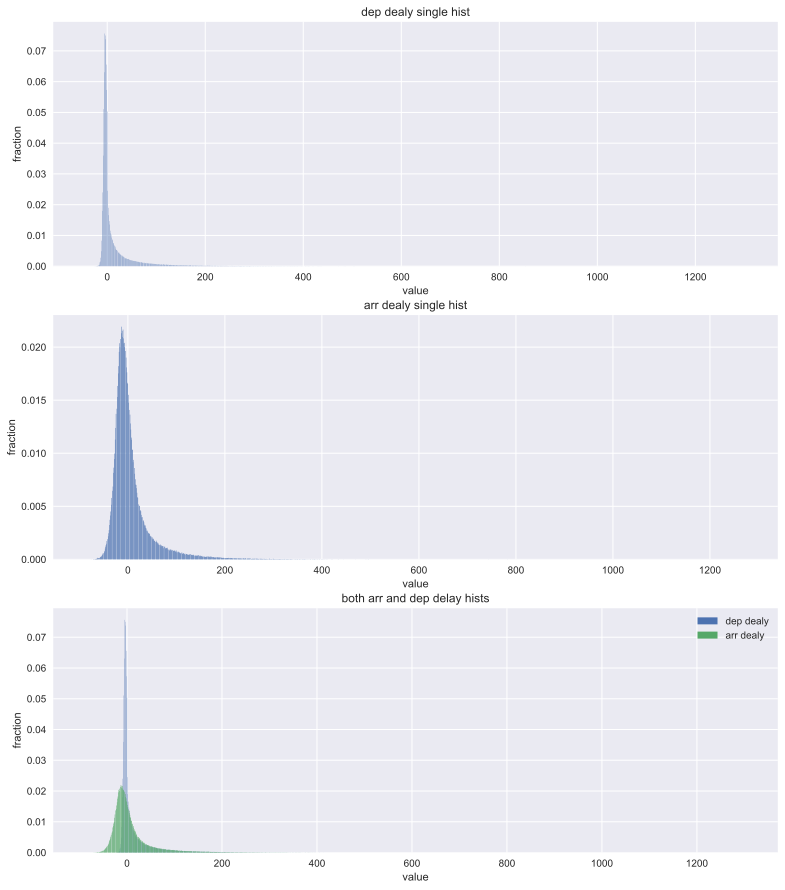

In [71]:
fig, ax = plt.subplots(3)
fig.set_size_inches(13, 15)

ax[0].set_title('dep delay hist')
ax[0].hist(bins_dep_delay[:-1], bins_dep_delay, weights=hist_dep_delay)
ax[0].set_xlabel('value')
ax[0].set_ylabel('fraction')

ax[1].set_title('arr delay hist')
ax[1].hist(bins_arr_delay[:-1], bins_arr_delay, weights=hist_arr_delay)
ax[1].set_xlabel('value')
ax[1].set_ylabel('fraction')

ax[2].set_title('arr and dep delay hists')
ax[2].hist(bins_dep_delay[:-1], bins_dep_delay, weights=hist_dep_delay, label="dep dealy")
ax[2].hist(bins_arr_delay[:-1], bins_arr_delay, weights=hist_arr_delay, label="arr dealy")
ax[2].legend()
ax[2].set_xlabel('value')
ax[2].set_ylabel('fraction')

plt.show()

#### Ограничим диапазон построения гисторграмм с помощью метода межквартильного размаха (метода Тьюки)

$IQR = Q3 - Q1, \ Q1 \ \text{и} \ Q3 - \text{первый и третий квартили,} \ IQR - \text{межквартильное расстояние}$<br>
$X1 = Q1 - 1.5 \cdot IQR, \ X2 = Q3 + 1.5 \cdot IQR$<br><br>
Значения, меньшие $X1$ или большие $X2$ -  выбросы.<br>
Ограничим диапазон гистограммы отрезком $[X1, X2]$

In [109]:
def iqr_out_detect(data):
    '''
    Find outliers and with IQR method.
    :param ndarray data: Array with values
    :return: Tuple with x1, x2 and outliers from data
    '''
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    x1, x2 = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    return x1, x2, data[(data < x1) | (data > x2)]


Построим те же гистограммы, но ограничим диапазон и выкинем выбросы из данных

<small> Достаточно только ограничить диапазонон, но без выбросов построение займет меньше времени, а результат идентичен</small>

In [110]:
dep_x1, dep_x2, dep_out = iqr_out_detect(X['dep_delay'])
arr_x1, arr_x2, arr_out = iqr_out_detect(X['arr_delay'])

In [117]:
## Make histogram with a Freedman Diaconis Estimator
hist_dep_delay, bins_dep_delay = np.histogram(X['dep_delay'][(X['dep_delay'] >= dep_x1) & (X['dep_delay'] <= dep_x2)], bins='fd')
hist_arr_delay, bins_arr_delay = np.histogram(X['arr_delay'][(X['arr_delay'] >= arr_x1) & (X['arr_delay'] <= arr_x2)], bins='fd')

# Normalization
hist_dep_delay = hist_dep_delay / len(X['dep_delay'])
hist_arr_delay = hist_arr_delay / len(X['arr_delay'])

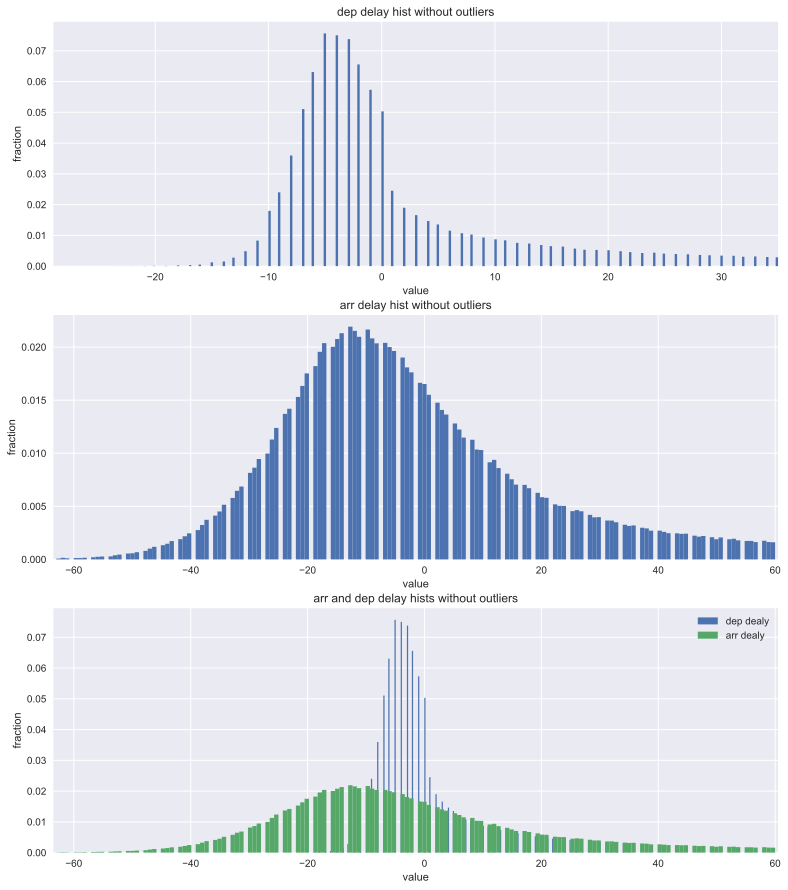

In [118]:
fig, ax = plt.subplots(3)
fig.set_size_inches(13, 15)

ax[0].set_title('dep delay hist without outliers')
ax[0].hist(bins_dep_delay[:-1], bins_dep_delay, weights=hist_dep_delay)
ax[0].set_xlabel('value')
ax[0].set_ylabel('fraction')

ax[1].set_title('arr delay hist without outliers')
ax[1].hist(bins_arr_delay[:-1], bins_arr_delay, weights=hist_arr_delay)
ax[1].set_xlabel('value')
ax[1].set_ylabel('fraction')

ax[2].set_title('arr and dep delay hists without outliers')
ax[2].hist(bins_dep_delay[:-1], bins_dep_delay, weights=hist_dep_delay, label="dep dealy")
ax[2].hist(bins_arr_delay[:-1], bins_arr_delay, weights=hist_arr_delay, label="arr dealy")
ax[2].legend()
ax[2].set_xlabel('value')
ax[2].set_ylabel('fraction')

## Ограничим диапазон гистограмм
ax[0].set_xlim(dep_x1, dep_x2)
ax[1].set_xlim(arr_x1, arr_x2)
ax[2].set_xlim(min(dep_x1, arr_x1), max(dep_x2, arr_x2))

plt.show()

Характер выбросов

In [116]:
print(f'Кол-во выбросов для dep_delay: {len(dep_out)}')
print(f'Диапазон их значений: [{dep_out.min()}, {dep_x1}] & [{dep_x2}, {dep_out.max()}]\n\n')

print(f'Кол-во выбросов для arr_delay: {len(arr_out)}')
print(f'Диапазон их значений: [{arr_out.min()}, {arr_x1}] & [{arr_x2}, {arr_out.max()}]')

Кол-во выбросов для dep_delay: 42857
Диапазон их значений: [-43.0, -29.0] & [35.0, 1301.0]


Кол-во выбросов для arr_delay: 27880
Диапазон их значений: [-86.0, -63.5] & [60.5, 1272.0]


Из особенностей полученных распределний я бы выделил:    
    
1. С ростом значения времени задержки они оба сначала резко растут, а потом очень плавно убывают. Это говорит о том, что ранние вылеты/возварщения случаются крайне редко, тогда как задержки относительно чаще бывают разными по длительности    
    
2. Пик обоих распределений приходится на значения меньше нуля. <s>В среднем полеты отправляются/возвращаются раньше.</s>